# K-Nearest Neighbors and Naive Bayes
An implementation of the K-Nearest Neighbors and Naive Bayes algorithm for the digit recognition dataset. 

In [207]:
import pandas as pd
import numpy as np
import os
%matplotlib inline


## 1. Import Training Set
Load each file and convert into a numpy vector (add it to a pandas dataframe).

There will be 1024 features (since the size is 32x32) for each digit followed by the digit label. The digit's label can be included from the file name.

In [208]:
"""Function to convert image to a vector"""
def img2vector(filename):
    returnVect = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
        
    return returnVect


### 1.a. Convert all files to a vector and create a dataframe

Convert the training and testing data to numpy arrays and create a dataframe.

In [209]:
"""Training data"""
path = '/home/sibi/acad/mach_learn_with_networks/assignment1/digits/trainingDigits/'
files = os.listdir(path)
df_train = pd.DataFrame(columns = range(1024))
i=0
y = np.array([])
for file in files:
    df_train.loc[i]=np.transpose(img2vector(path+file)[0])
    y = np.append(y,int(file[0]))
    i+=1
df_train[1024] = y
df_train = df_train.astype(int)


In [210]:
"""Test data"""
path = '/home/sibi/acad/mach_learn_with_networks/assignment1/digits/testDigits/'
files = os.listdir(path)
df_test = pd.DataFrame(columns = range(1024))
i=0
y = np.array([])
for file in files:
    df_test.loc[i]=np.transpose(img2vector(path+file)[0])
    y = np.append(y,int(file[0]))
    i+=1
df_test[1024] = y
df_test = df_test.astype(int)


### 1.b. Show one sample from each as a binary image

Pick one random binary text file and convert it to a binary image. Store the file.

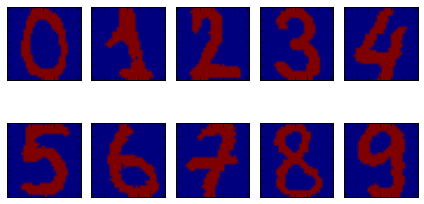

In [212]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
fig = plt.figure()
num = 0
for i in range(2):
    for j in range(5):
        ax = plt.subplot2grid((2,5), (i,j))
        data = img2vector("/home/sibi/acad/mach_learn_with_networks/assignment1/digits/trainingDigits/" + str(num) +"_50.txt")
        data = data.reshape(32,32)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.imshow(data)
        num +=1 
fig.tight_layout()
plt.show()


## 2. K-Nearest Neighbor Classifier
We train a knn classifier on the training set that we imported in the previous step. We then find its trianing error on a range of k-values from 1 to 10. We then also use it on the testing set to make predictions and check the performance.

### 2.a. Prepare data for KNN

In [213]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [214]:
X_train = df_train.loc[:,0:1023]
y_train = df_train.loc[:,1024]
X_test = df_test.loc[:,0:1023]
y_test = df_test.loc[:,1024]
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)
#print(type(y_train[0]))


### 2.b. knn on the training data set

In [271]:
%%time
train_accuracies = []
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_train)
    acc = metrics.accuracy_score(y_train, y_pred)
    print acc
    train_accuracies.append(acc)
KNN_train_accuracy = np.mean(train_accuracies)
print("--------------------------")
print("Mean accuracy : {}".format(KNN_train_accuracy))
print("--------------------------")
print("Running time for this code")

1.0
0.987073422958
0.986556359876
0.981385729059
0.981902792141
0.980351602896
0.977766287487
0.974146845915
0.976215098242
0.97569803516
--------------------------
Mean accuracy : 0.982109617373
--------------------------
Running time for this code
CPU times: user 1min 20s, sys: 9.83 ms, total: 1min 20s
Wall time: 1min 20s


In [ ]:
#print("Mean accuracy : {}".format(np.mean(train_accuracies)))

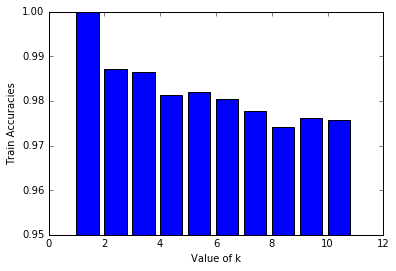

In [217]:
plt.bar(range(1,11),train_accuracies)
plt.ylim(0.95,1)
plt.ylabel("Train Accuracies")
plt.xlabel("Value of k")
plt.show()

### 2.b. knn on the testing data set

In [267]:
%%time
test_accuracies = []
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print acc
    test_accuracies.append(acc)
KNN_test_accuracy = np.mean(test_accuracies)
print("--------------------------")
print("Mean accuracy : {}".format(KNN_test_accuracy))
print("--------------------------")
print("Running time for this code")

0.987315010571
0.976744186047
0.987315010571
0.983086680761
0.980972515856
0.976744186047
0.975687103594
0.975687103594
0.974630021142
0.975687103594
Mean accuracy : 0.979386892178
Running time for this code
--------------------------
CPU times: user 39.3 s, sys: 27.4 ms, total: 39.4 s
Wall time: 39.4 s


In [ ]:
#print("Mean accuracy : {}".format(np.mean(test_accuracies)))

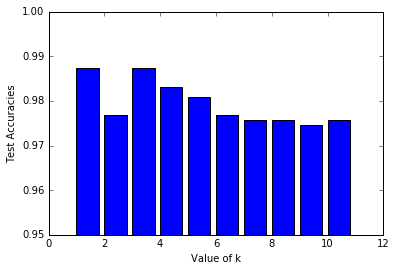

0.97938689217758979

In [82]:
plt.bar(range(1,11),test_accuracies)
plt.ylim(0.95,1)
plt.ylabel("Test Accuracies")
plt.xlabel("Value of k")
plt.show()
np.mean(test_accuracies)

## 3. Naive Bayes Classifier

We use the training data set to learn the conditional probabilities and subsequently use it in predictions.

In [266]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [264]:
"""Training"""
NB.fit(X_train,y_train)
y_pred = NB.predict(X_train)
#print("Number of mislabeled points out of a total %d points : %d"% (X_train.shape[0],(y_test != y_pred).sum()))
NB_train_accuracy = metrics.accuracy_score(y_train, y_pred)
NB_train_accuracy

0.79162357807652539

In [262]:
"""Testing"""
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)
#print("Number of mislabeled points out of a total %d points : %d"% (X_train.shape[0],(y_test != y_pred).sum()))
NB_test_accuracy = metrics.accuracy_score(y_test, y_pred)
NB_test_accuracy

0.73361522198731499

# Principal Component Analysis 

We apply PCA on the original data (both training and testing set). We then perform both KNN and NB training and evaluation to estimate how much of a difference PCA makes.

### Project onto a lower dimensional subspace
A quesiton that arises when using PCA is how many components should we choose? We use the inbuilt function in scikitlearn "explained\_variance\_ratio\_".This lets us look at how much variance is covered by each principal component. For simplicity sake, I have taken number of components to be 200 and it explains nearly 90% of the variance of data. This seems like a reasonable assumption to make.

[ 10.14  19.81  27.95  33.7   37.93  41.76  45.03  47.81  50.3   52.55
  54.53  56.21  57.68  59.02  60.25  61.41  62.47  63.5   64.41  65.29
  66.07  66.85  67.56  68.24  68.83  69.38  69.89  70.37  70.83  71.28
  71.71  72.11  72.5   72.88  73.23  73.56  73.88  74.19  74.49  74.77
  75.05  75.32  75.58  75.83  76.07  76.3   76.53  76.74  76.95  77.15
  77.35  77.54  77.73  77.92  78.1   78.27  78.44  78.61  78.78  78.94
  79.1   79.26  79.42  79.57  79.72  79.87  80.02  80.17  80.31  80.45
  80.59  80.73  80.86  80.99  81.12  81.25  81.38  81.5   81.62  81.74
  81.86  81.98  82.1   82.21  82.32  82.43  82.54  82.65  82.76  82.87
  82.98  83.08  83.18  83.28  83.38  83.48  83.58  83.68  83.78  83.88
  83.97  84.06  84.15  84.24  84.33  84.42  84.51  84.6   84.69  84.78
  84.87  84.96  85.04  85.12  85.2   85.28  85.36  85.44  85.52  85.6
  85.68  85.76  85.84  85.92  86.    86.08  86.16  86.24  86.32  86.39
  86.46  86.53  86.6   86.67  86.74  86.81  86.88  86.95  87.02  87.09
  87.16

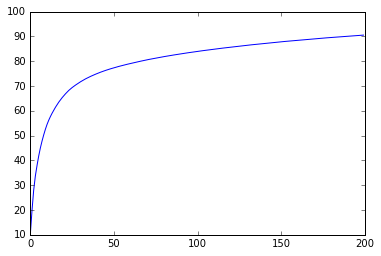

In [239]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
pca.fit(X_train)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)

In [241]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### KNN on the transformed data

In [257]:
%%time
train_accuracies_pca = []
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_pca,y_train)
    y_pred = knn.predict(X_train_pca)
    acc = metrics.accuracy_score(y_train, y_pred)
    print acc
    train_accuracies_pca.append(acc)
KNN_pca_train_accuracy = np.mean(train_accuracies_pca)
print("--------------------------")
print("Mean accuracy : {}".format(KNN_pca_train_accuracy))
print("--------------------------")
print("Running time for this code")


1.0
0.988107549121
0.986556359876
0.984488107549
0.984488107549
0.979317476732
0.97880041365
0.976732161324
0.978283350569
0.976732161324
--------------------------
Mean accuracy : 0.983350568769
--------------------------
Running time for this code
CPU times: user 14 s, sys: 3.68 ms, total: 14 s
Wall time: 14 s


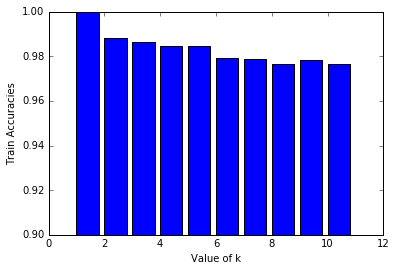

In [243]:
plt.bar(range(1,11),train_accuracies_pca)
plt.ylim(0.90,1)
plt.ylabel("Train Accuracies")
plt.xlabel("Value of k")
plt.show()

In [256]:
%%time
test_accuracies_pca = []
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_pca,y_train)
    y_pred = knn.predict(X_test_pca)
    acc = metrics.accuracy_score(y_test, y_pred)
    print acc
    test_accuracies_pca.append(acc)
KNN_pca_test_accuracy = np.mean(test_accuracies_pca)
print("--------------------------")
print("Mean accuracy : {}".format(KNN_pca_test_accuracy))
print("--------------------------")
print("Running time for this code")


0.986257928118
0.978858350951
0.989429175476
0.982029598309
0.982029598309
0.978858350951
0.975687103594
0.976744186047
0.973572938689
0.975687103594
--------------------------
Mean accuracy : 0.979915433404
--------------------------
Running time for this code
CPU times: user 6.8 s, sys: 0 ns, total: 6.8 s
Wall time: 6.78 s


In [245]:
#print np.mean(test_accuracies_pca)

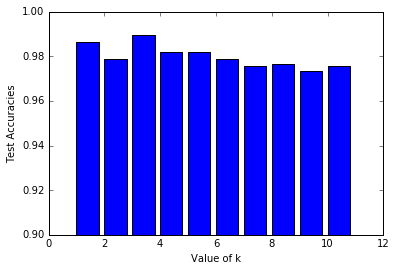

In [246]:
plt.bar(range(1,11),test_accuracies_pca)
plt.ylim(0.90,1)
plt.ylabel("Test Accuracies")
plt.xlabel("Value of k")
plt.show()

------------------------------------------------------------

### Naive Bayes on the transformed data 

#### Training data

In [255]:
%%time
NB.fit(X_train_pca,y_train)
y_pred = NB.predict(X_train_pca)
#print("Number of mislabeled points out of a total %d points : %d"% (X_train.shape[0],(y_test != y_pred).sum()))
NB_pca_train_accuracy = metrics.accuracy_score(y_train, y_pred)
print("Accuracy : {}".format(NB_pca_train_accuracy))
print("--------------------------")
print("Running time for this code")


Accuracy : 0.9632885212
--------------------------
Running time for this code
CPU times: user 39.9 ms, sys: 0 ns, total: 39.9 ms
Wall time: 40.5 ms


#### Test data

In [253]:
%%time
NB.fit(X_train_pca,y_train)
y_pred = NB.predict(X_test_pca)
#print("Number of mislabeled points out of a total %d points : %d"% (X_train.shape[0],(y_test != y_pred).sum()))
NB_pca_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy : {}".format(NB_pca_test_accuracy))
print("--------------------------")
print("Running time for this code")


Accuracy : 0.948202959831
--------------------------
Running time for this code
CPU times: user 23.7 ms, sys: 0 ns, total: 23.7 ms
Wall time: 27.3 ms


## Conclusion

We try and compare the performance of the two classifiers before and after applying PCA based on both their accuracies as well as their running times.

### KNN and PCA (training)
As can be seen from the plot, there isn't much difference in the accuracies when it 

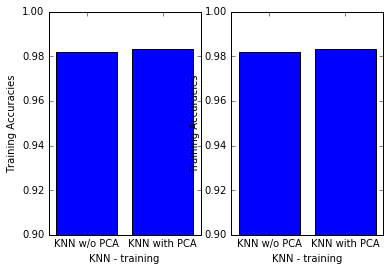

In [335]:
fig = plt.figure()
#training
ax1 = fig.add_subplot(1,2,1)
plt.bar([1,2],[KNN_train_accuracy, KNN_pca_train_accuracy], align = "center")
plt.ylim(0.90,1)
plt.ylabel("Training Accuracies")
plt.xlabel("KNN - training")
plt.xticks(range(1,3),[ "KNN w/o PCA", "KNN with PCA"])
#plt.show()

ax1 = fig.add_subplot(1,2,2)
plt.bar([1,2],[KNN_train_accuracy, KNN_pca_train_accuracy], align = "center")
plt.ylim(0.90,1)
plt.ylabel("Training Accuracies")
plt.xlabel("KNN - training")
plt.xticks(range(1,3),[ "KNN w/o PCA", "KNN with PCA"])
plt.show()

